# Geospatial Data Science - EEPS 440/460

# Lecture 5

# Introduction to Probability

# Anouncements:
### HW0 is due on February 6th, HW1 is posted and it due on February 25th 2024
### Office hours tomorrow from 3-5pm

# Reading Article:
https://medium.com/planet-stories/the-explosion-of-geospatial-data-and-the-rise-of-deep-learning-b22aa8fef519

In [4]:
# Optional - you can make your plots nicer with styles
import matplotlib.pyplot as plt
# Use a popular style
plt.style.use('seaborn-v0_8-darkgrid')  # Example of a good style

# Population vs. Sample

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
file = '../data/NED/dem_lat3940_lon-93-92.tif'
#Open up access to the file
fp = rasterio.open(file)
#Read the first band (each time step would be a different band in a 3d array of time/lat/lon)
dem = fp.read(1)[1000:1500,1000:1500]
print('DEM data size:', dem.shape)

In [ ]:
#Make a quick plot
plt.figure(figsize=(15,15))
plt.imshow(np.flipud(dem),cmap=plt.get_cmap('terrain'),vmin=200,vmax=250)
plt.colorbar(orientation='horizontal',shrink=0.6,pad=0.05)
plt.title("Elevation (meters)",fontsize=50)
plt.axis('off')
plt.show()

## Assume that all the pixel values together constitute the population. 
## Then what is a sample?

In [ ]:
import numpy as np
#Let's sample 100 different points
np.random.seed(1)
x = np.random.choice(np.arange(dem.shape[0]),1000)
y = np.random.choice(np.arange(dem.shape[1]),1000)
plt.figure(figsize=(15,15))
plt.scatter(y,x,s=100,c=dem[x,y],cmap=plt.get_cmap('terrain'),vmin=200,vmax=250)
plt.colorbar(orientation='horizontal',shrink=0.6,pad=0.05)
plt.title("Elevation (meters)",fontsize=50)
plt.xticks([])
plt.yticks([])
plt.show()

In this case, by definition, the population includes all of the elements from the 2d array. A sample consists one or more observations drawn from the population.



### Most of what we try to do with statistics is to learn something about the population from a sample

# Example application: Create elevation map

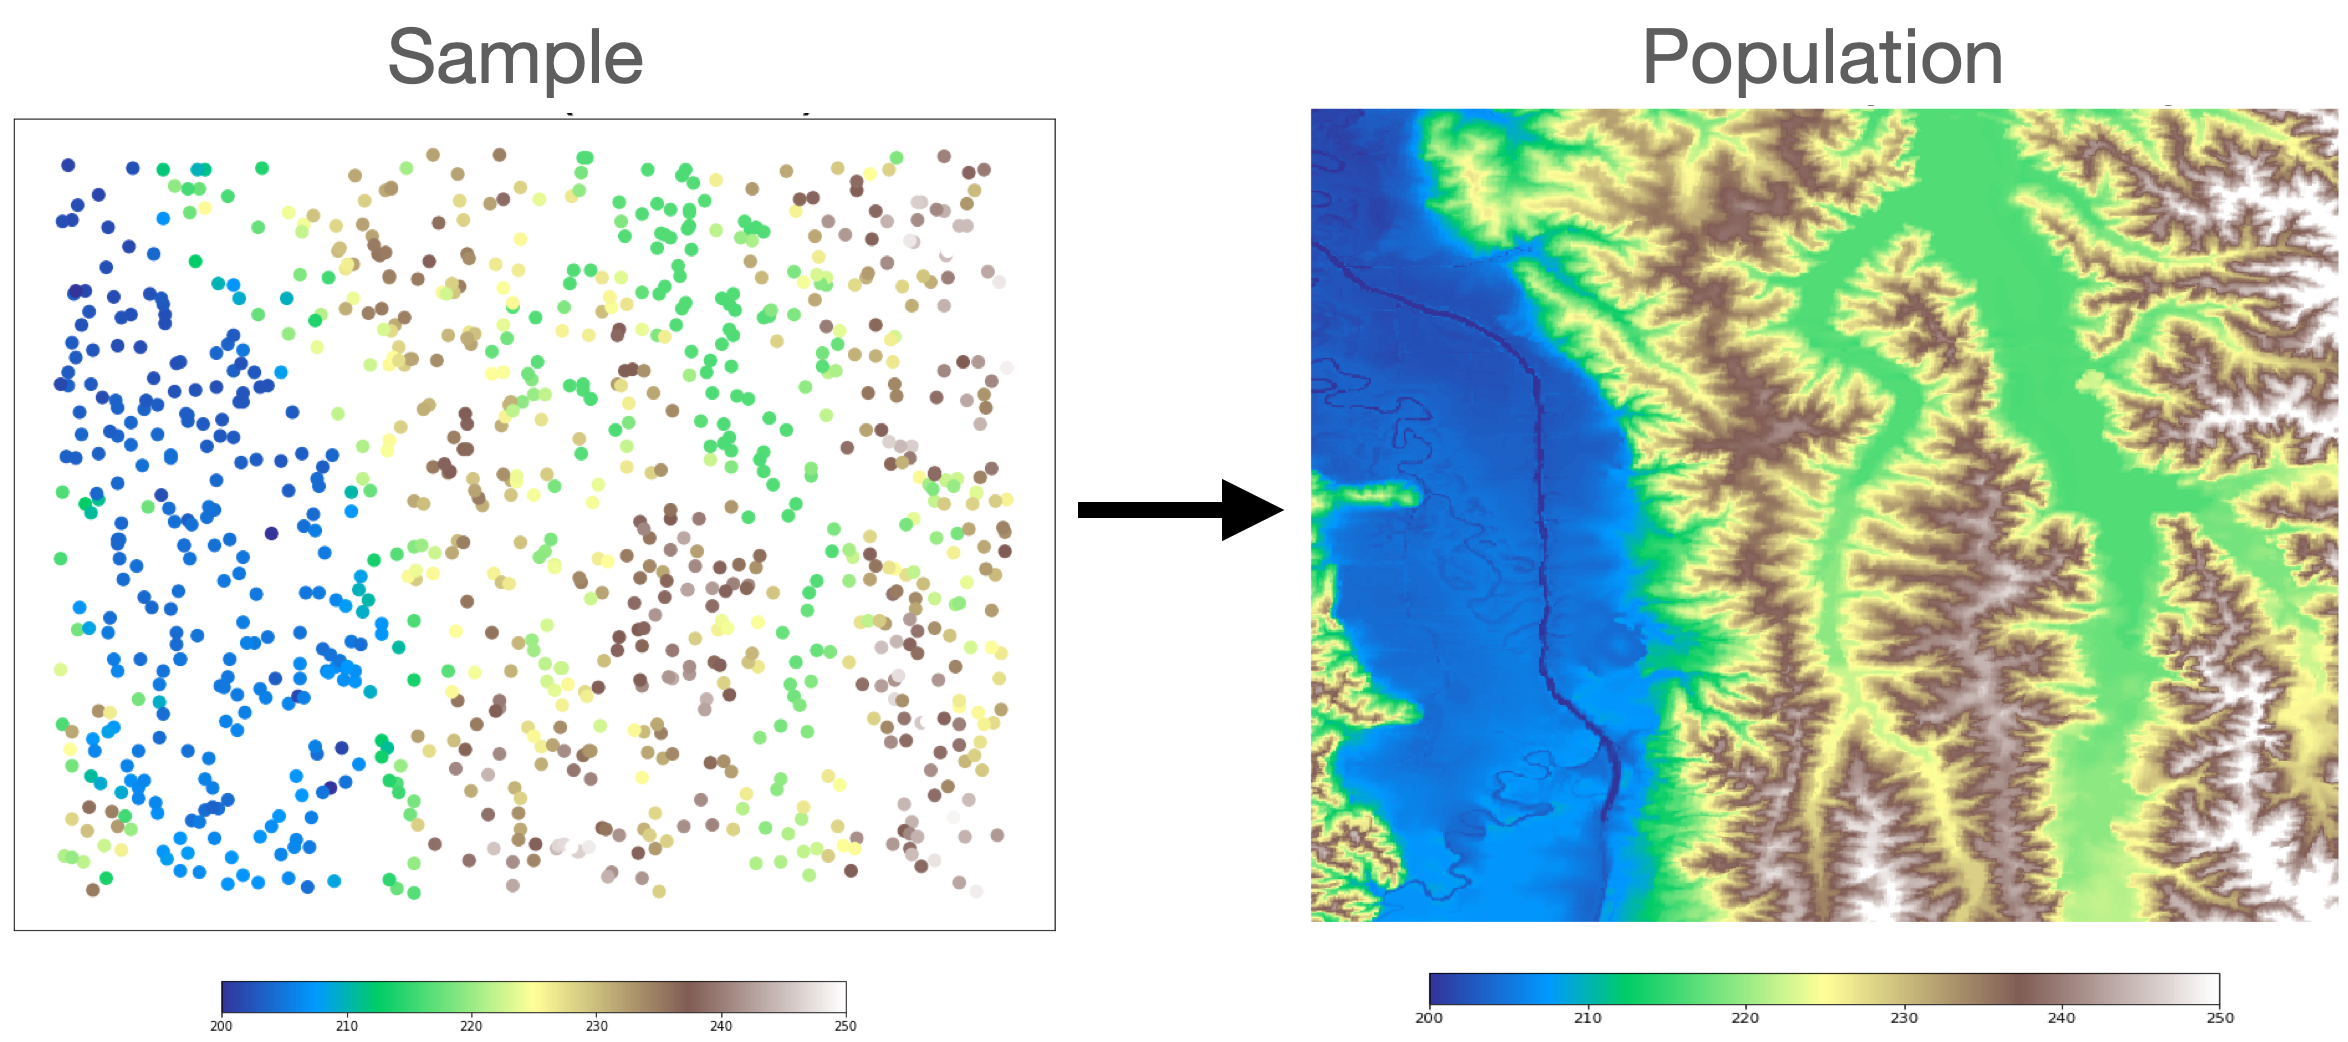

The concept of spatial interpolation is the foundation of spatial statistics and one that we will explore in detail later in the course.

#### Let's now think about the elevation data as a random variable $X$. 

A random variable, $X$, is a variable whose numerical values depend on outcomes from a random event. 

So we can interpret our sample as the numerical values from a random event (sampling the population).

# Discrete vs Continuous Random Variables

A random variable can be discrete (e.g., dice) or continuous (e.g., temperature).

<img src="https://miro.medium.com/max/994/1*c2ylMCItL1XG6O3mGhjzng.png" width="800">

What are some examples of discrete random variables vs continuous random variables?

### Given the way that we constructed our population vs. sample example of the elevation map, would we think of the random variable $X$ in that context as discrete or continuous?

#### Elevation is a continuous variable, but when stored in raster format, it is represented using discrete pixel values, which can give the illusion of discreteness.

# Univariate vs Multivariate RVs

<img src="https://qph.fs.quoracdn.net/main-qimg-7f0d4548ccb111afb5dc65f6ae03248d-c" width="700">

We can think of our elevation example as a univariate random variable. Today we will focus on univariate random variables but we will be covering lots about multivariate random variables later on.

# Continuous Random Variables (Intuitive explanation)

A random variable $X$ is continuous if possible values comprise either a single interval on the number line or a union of disjoint intervals. 

Example: If we didn't discretize the elevation data, we could think about all possible values across the domain being somewhere on the real line between $z_{min}$ to $z_{max}$.

# Continuous Random Variables (more formal definition)

Let $X$ be a random variable whose set of possible values is *uncountable*. $X$ is a *continuous* random variable if there exists a nonnegative function $f(x)$, defined for a real $x \in (-\infty,\infty)$, having the property that for any set where $x \in [a,b]$ of real numbers

$$P \{a \leq X \leq b\} = \int_{a}^{b} f(x) dx$$

The function $f(x)$ is called the *probability density function* of the random variable $X$. 

The relationship between the cumulative distribution $F$ and the probability density $f$ is expressed by

$$F(a) = P\{-\infty \lt x \leq a\} = \int_{-\infty}^a f(x) dx$$

If we let $b = a$ then:

$$P\{X = a\} = \int_a^a f(x) dx = 0$$

In other words, the probability that a continuous random variable will assume any particular value is zero.

If $x \in (-\infty,\infty)$ then:

$$P\{-\infty \leq X \leq \infty\} = \int_{-\infty}^{\infty}f(x)dx = 1$$ 

The total probability when integrating the probability density function from $-\infty$ to $\infty$ must be 1.

### Does that mean that the probability density function $f(x)$ must always be higher than $0$?

# Examples of continuous distributions

# Uniform

A **continuous uniform distribution** is defined on an interval [$\alpha$, $\beta$], where every value in that interval has an equal probability density.

### Parameters:
- **\(a\) (lower bound)** – The minimum value that the random variable can take.
- **\(b\) (upper bound)** – The maximum value that the random variable can take.

### Probability Density Function (PDF):

$$f(x) = \frac{1}{\beta - \alpha},\;\alpha < x < \beta$$

$$f(x) = 0, \text{otherwise}$$

- The density function is **constant** between ($\alpha$)and ($\beta$).
- Outside this range, the probability is **zero**.

### Cumulative distribution function (CDF):

$$F(a) = 0, a \leq \alpha$$

$$F(a) = \frac{a - \alpha}{\beta - \alpha}, \alpha \lt a \lt \beta$$

$$F(a) = 1, a \geq \beta$$

- The CDF linearly increases from 0 to 1 in the range [$\alpha$, $\beta$].

In [ ]:
%%html
<iframe width="939" height="528" src="https://docs.scipy.org/doc/scipy-1.15.1/reference/generated/scipy.stats.uniform.html" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
x = np.linspace(-1,5,1000)
plt.figure(figsize=(12,6))
#Plot the pdf of the uniform
plt.subplot(121)
plt.plot(x,scipy.stats.uniform.pdf(x,0,1),'r-', lw=5)
plt.plot(x,scipy.stats.uniform.pdf(x,1,2),'b-', lw=5)
plt.plot(x,scipy.stats.uniform.pdf(x,0,4),'g-', lw=5)
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel('PDF',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid('on')
#Plot the cdf of the uniform
plt.subplot(122)
plt.plot(x,scipy.stats.uniform.cdf(x,0,1),'r-', lw=5)
plt.plot(x,scipy.stats.uniform.cdf(x,1,2),'b-', lw=5)
plt.plot(x,scipy.stats.uniform.cdf(x,0,4),'g-', lw=5)
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel('CDF',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend([r'$\alpha$ = 0, $\beta$ = 1',r'$\alpha$ = 1, $\beta$ = 3',r'$\alpha$ = 0, $\beta$ = 4'],
           fontsize=18, bbox_to_anchor=(1.1, 0.25, 0.5, 0.5),loc=10)
plt.grid('on')
plt.show()

# Exponential random variable

The **exponential distribution** models the time between events in a Poisson process, where events occur continuously and independently at a constant average rate.

### Parameters:
- **$\lambda$ (rate parameter)** – The average number of events per unit time.  
- The mean time between events is **1/$\lambda$**.

### Probability density function (PDF):

$$f(x) = \lambda e^{-\lambda x},\; x \geq 0$$

$$f(x) = 0,\; x \lt 0$$

- The function is **monotonically decreasing**, meaning higher values of *x* have lower probabilities.
- The PDF is **zero for negative values** since time cannot be negative.

### Cumulative distribution function (CDF):

$$F(a) = 1 - e^{-\lambda a}, a \geq 0$$


- The CDF gives the probability that  *x* is **less than or equal to** a given value.


In [ ]:
%%html
<iframe width="939" height="528" src="https://docs.scipy.org/doc/scipy-1.15.1/reference/generated/scipy.stats.expon.html" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
import scipy.stats
x = np.linspace(-1,10,1000)
plt.figure(figsize=(12,6))
#Plot the pdf
plt.subplot(121)
#Note that the parameters that scipy asks for are slightly different than
#the parameters that we use to describe the PDF. You need to convert them.
plt.plot(x,scipy.stats.expon.pdf(x,0,0.1),'r-', lw=5)
plt.plot(x,scipy.stats.expon.pdf(x,0,0.5),'b-', lw=5)
plt.plot(x,scipy.stats.expon.pdf(x,0,2),'g-', lw=5)
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel('PDF',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend([r'$\lambda$ = 10',r'$\lambda$ = 2',r'$\lambda$ = 0.5'],fontsize=18)
plt.grid('on')
#Plot the cdf
plt.subplot(122)
plt.plot(x,scipy.stats.expon.cdf(x,0,0.1),'r-', lw=5)
plt.plot(x,scipy.stats.expon.cdf(x,0,0.5),'b-', lw=5)
plt.plot(x,scipy.stats.expon.cdf(x,0,2),'g-', lw=5)
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel('CDF',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend([r'$\lambda$ = 10',r'$\lambda$ = 2',r'$\lambda$ = 0.5'],
           fontsize=18, bbox_to_anchor=(1.02, 0.25, 0.5, 0.5),loc=10)
plt.grid('on')
plt.show()

# Normal (Gaussian) random variable

The **normal distribution**, also known as the **Gaussian distribution**, is a continuous probability distribution characterized by its **bell-shaped curve**. It is widely used in statistics and natural sciences.

### Parameters:
- **$\mu$ (mean)** – The central value where the peak of the distribution occurs.
- **$\sigma$ (standard deviation)** – Determines the spread or dispersion of the distribution.
- The variance is given by $\sigma^2$.

### Probability density function (PDF):

$$f(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-(x-\mu)^2/{2\sigma^2}}, -\infty < x < \infty$$

- The **peak** of the distribution occurs at $x = \mu$.
- The **spread** is controlled by $\sigma$; larger values result in a wider curve.

### Cumulative distribution function (PDF):

$$F(a) = \frac{1}{2}\left[1 + \text{erf}\left(\frac{a - \mu}{\sigma \sqrt{2}}\right)\right]$$

In [ ]:
%%html
<iframe width="939" height="528" src="https://docs.scipy.org/doc/scipy-1.15.1/reference/generated/scipy.stats.norm.html" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
import scipy.stats
x = np.linspace(-10,10,1000)
plt.figure(figsize=(12,6))
#Plot the pdf
plt.subplot(121)
plt.plot(x,scipy.stats.norm.pdf(x,0,1),'r-', lw=5)
plt.plot(x,scipy.stats.norm.pdf(x,2,0.5),'b-', lw=5)
plt.plot(x,scipy.stats.norm.pdf(x,-1,3),'g-', lw=5)
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel('PDF',fontsize=20)
plt.xticks(fontsize=15,rotation=35)
plt.yticks(fontsize=15)
plt.grid('on')
#Plot the cdf
plt.subplot(122)
plt.plot(x,scipy.stats.norm.cdf(x,0,1),'r-', lw=5)
plt.plot(x,scipy.stats.norm.cdf(x,2,0.5),'b-', lw=5)
plt.plot(x,scipy.stats.norm.cdf(x,-1,3),'g-', lw=5)
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel('CDF',fontsize=20)
plt.xticks(fontsize=15,rotation=35)
plt.yticks(fontsize=15)
plt.legend([r'$\mu$ = 0, $\sigma$ = 1',r'$\mu$ = 2, $\sigma$ = 0.5',r'$\mu$ = -1, $\sigma$ = 3'],
           fontsize=18, bbox_to_anchor=(1.1, 0.25, 0.5, 0.5),loc=10)
plt.grid('on')
plt.show()

# Population vs. sample revisited

In [ ]:
#Create a random variable
#Normal distribution (mean=0,standard deviation=1)
rv = scipy.stats.norm(loc=0,scale=1)
#Draw 100 samples from that random variable
samples = rv.rvs(size=1000)
#Create a histogram using the samples
plt.hist(samples,bins=50,density=1)
#Superimpose the "fixed" pdf
x = np.linspace(-4,4,100)
plt.plot(x,rv.pdf(x),'r-', lw=5)
plt.legend(['Population','Sample'],fontsize=15)
plt.show()

How would we estimate the parameters for the distribution from a given sample?

# Fit a distribution

In [ ]:
#Create a random variable
#Normal distribution (mean=0,standard deviation=1)
rv = scipy.stats.norm(loc=0,scale=1)
#Fix random seed
np.random.seed(1)
#Draw 100 samples from that random variable
sample = rv.rvs(size=100)
#Create a histogram using the samples
plt.hist(samples,bins=100,density=1)
#Superimpose the "fixed" pdf
x = np.linspace(-4,4,100)
plt.plot(x,rv.pdf(x),'r-', lw=5)
#Fit a normal distribution to the sample data
params = scipy.stats.norm.fit(sample)
#Superimpose the pdf of the fitted distribution
plt.plot(x,scipy.stats.norm.pdf(x,params[0],params[1]),'g-', lw=5)
plt.title(r'$\hat{\mu}$ = %.3f, $\hat{\sigma}$ = %.3f' % (params[0],params[1]),fontsize=20)
plt.show()

# Always remember...

$$\hat{\mu} \approx \mu$$

$$\hat{\sigma} \approx \sigma$$

**Law of Large Numbers**: As the sample size increases, the sample mean converges to the true population mean.

# Fitting a distribution: Maximum Likelihood Estimation (MLE)

MLE estimates the parameters of a distribution by maximizing a likelihood function. In other words, we search for the probability distribution from which our observed data is most probable. 

We don't have time to rigorously cover MLE in this course. However, it is always good to know what is going on under the hood. If you are interested, there are many resources out there.

Note that there are other approaches to estimate the parametric distribution parameters.

# Empirical Cumulative Distribution Function

The empirical distribution function is an estimate of the cumulative distribution function that generated the points in the sample.

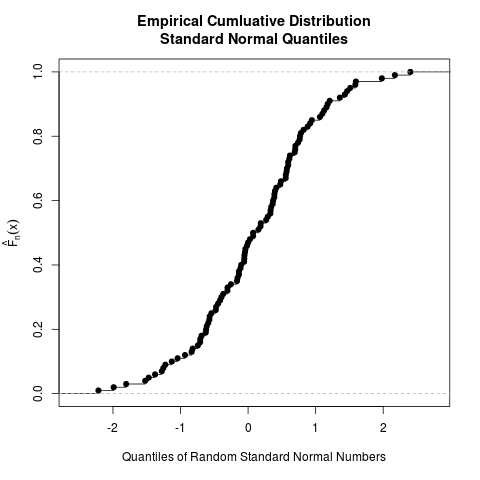

In [ ]:
def compute_ecdf(data):
    x = np.sort(data)
    n = x.size
    #Use weibull plotting positions
    y = np.arange(1, n+1) / n
    return(x,y)

#Create a random variable
#Normal distribution (mean=0,standard deviation=1)
rv = scipy.stats.norm(loc=0,scale=1)
#Fix random seed
np.random.seed(1)
#Draw 100 samples from that random variable
sample = rv.rvs(size=100)
#Plot the "true" cdf
x = np.linspace(-4,4,100)
plt.figure(figsize=(10,4))
plt.plot(x,rv.cdf(x),'r-', lw=5)
#Compute the empirical CDF (ecdf)
(x,y) = compute_ecdf(sample)
#Plot the ecdf
plt.plot(x,y,lw=5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('CDF',fontsize=20)
plt.show()

# Percentiles

A percentile is a a measure indicating the value below which a given percentage of observations of a sample of observations falls. 

How do we interpret the concept of a percentile in an empirical cumulative distribution function?

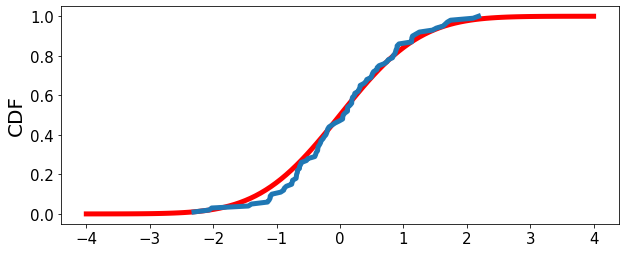

Let's look at distributions with some actual data 

<img src="https://ldas.gsfc.nasa.gov/sites/default/files/ldas/nldas/nldasbig.png" width="400">



# NLDAS

The North American Land Data Assimilation System (NLDAS) assembles quality-controlled, and spatially and temporally consistent, land-surface model (LSM) datasets forced with the available observations and weather model output. Data sets are available down to the hourly time scales. These data are then used in both research and applications for drought and flood monitoring, precision agriculture, and water management, among others.

More information? Go [here](https://climatedataguide.ucar.edu/climate-data/nldas-north-american-land-data-assimilation-system)

## Detour: What is a land surface model (LSM)?

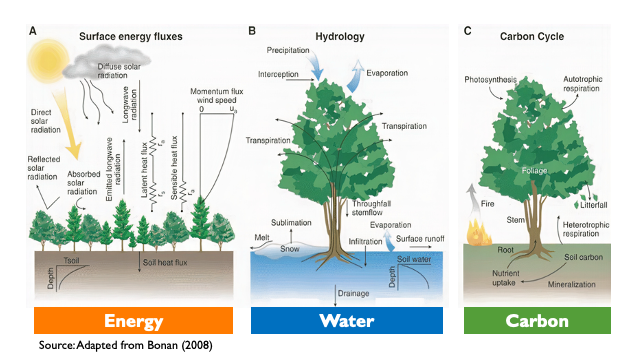

Want to learn more? Upcoming hydrology course in the Spring 

In [ ]:
import netCDF4 as nc
import datetime
file = '../data/NLDASv2/NLDAS_NOAH0125_M.002.nc'
fp = nc.Dataset(file)
dates = nc.num2date(fp['time'][:],units=fp['time'].units,calendar='standard')
tmp = []
for date in dates:
    tmp.append(datetime.datetime(date.year,date.month,1))
dates = np.array(tmp)
#Compute the temporal mean of evapotranspiration for 2016
m = (dates >= datetime.datetime(2016,1,1)) & (dates <= datetime.datetime(2016,12,31))
data = np.mean(fp['evpsfc'][m,:,:],axis=0)
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(data),cmap=plt.get_cmap('YlGnBu'))
plt.xticks([])
plt.yticks([])
cb= plt.colorbar(orientation='horizontal',pad=0.03,shrink=0.8)
cb.ax.tick_params(labelsize=18)
plt.title(r'Evapotranspiration (mm/month)',fontsize=23)
plt.show()

In [ ]:
#Let's extract the time series for Houston
lat = 29.7171
lon = -95.4041 
lats = fp['lat'][:]
lons = fp['lon'][:]
ilat = np.argmin(np.abs(lats - lat))
ilon = np.argmin(np.abs(lons - lon))
m = (dates >= datetime.datetime(1979,1,1)) & (dates <= datetime.datetime(2018,12,31))
evpsfc = fp['evpsfc'][m,ilat,ilon]
evpsfc = evpsfc.filled(np.nan)
plt.plot(dates[m],evpsfc)
plt.show()

In [ ]:
#Let's look at the distribution
plt.hist(evpsfc,bins=20)
plt.show()

How could we interpret the strong bimodality of the data?

In [ ]:
#Let's look at the distribution Winter, Spring, Summer, and Fall
winter = evpsfc[0::12] + evpsfc[1::12] + evpsfc[2::12]
spring = evpsfc[3::12] + evpsfc[4::12] + evpsfc[5::12]
summer = evpsfc[6::12] + evpsfc[7::12] + evpsfc[8::12]
fall = evpsfc[9::12] + evpsfc[10::12] + evpsfc[11::12]
#Make some plots
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.title('Winter',fontsize=20)
plt.hist(winter,density=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(222)
plt.title('Spring',fontsize=20)
plt.hist(spring,density=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(223)
plt.title('Summer',fontsize=20)
plt.hist(summer,density=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(224)
plt.title('Fall',fontsize=20)
plt.hist(fall,density=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.suptitle('Evapotranspiration (mm)',fontsize=35)
plt.show()

In [ ]:
#Let's fit and plot a Normal distribution to the Spring data
#First fit the distribution using MLE
params = scipy.stats.norm.fit(spring)
#Use the params to define the fixed distribution
rv = scipy.stats.norm(*params)
#Create a discretization of the analytical fitted pdf
x = np.linspace(np.min(spring),np.max(spring),200)

#Create the figure
plt.figure(figsize=(16,6))
#Plot the sample histogram and analytical pdf
plt.subplot(121)
plt.hist(spring,density=1)
#Compute the pdf for each x value
y = rv.pdf(x)
# Plot the fitted gama
plt.plot(x,y,lw=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('PDF',fontsize=25)

#Plot the empirical cdf and the analytical cdf
plt.subplot(122)
(x,y) = compute_ecdf(spring) #compute the empirical pdf
plt.plot(x,y,lw=5)
y = rv.cdf(x) #compute the CDF from fitted parameters
plt.plot(x,y,lw=5,linestyle='--')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('CDF',fontsize=25)
plt.suptitle('Spring Evapotranspiration (mm)',fontsize=35)
plt.show()

Let's explore percentiles for the Spring ET in Houston

In [ ]:
#5th percentile
print(np.percentile(spring,5))

In [ ]:
#50th percentile
print(np.percentile(spring,50))

In [ ]:
#95th percentile
print(np.percentile(spring,95))

Convert time series of values to corresponding percentile

In [ ]:
pcts = []
for val in spring:
    pcts.append(scipy.stats.percentileofscore(spring,val))
years = np.arange(1979,2019)

fig = plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax1.plot(years,spring,'b',lw=4) # years vs ET
ax1.tick_params(axis='y',labelcolor='b')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(years,pcts,'g',lw=4)  # years vs percentiles
ax2.tick_params(axis='y',labelcolor='g')
plt.sca(ax1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=25)
plt.ylabel('ET (mm/month)',color='b',fontsize=20)
plt.sca(ax2)
plt.yticks(fontsize=20)
plt.ylabel('Percentiles',color='g',fontsize=20)
plt.title('ET and corresponding percentiles',fontsize=20)
plt.show()

What is the 50th percentile for Julys across the United States?

In [ ]:
data = fp['evpsfc'][6::12,:,:] #Extract only Julys
p50 = np.percentile(data,50,axis=0) #Compute score at the 50th percentile over all time steps
p50 = np.ma.masked_array(p50,p50<0)
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(p50),cmap=plt.get_cmap('YlGnBu'))
plt.xticks([])
plt.yticks([])
cb= plt.colorbar(orientation='horizontal',pad=0.03,shrink=0.8)
cb.ax.tick_params(labelsize=18)
plt.title(r'Evapotranspiration (mm/month)',fontsize=23)
plt.show()

In [ ]:
#Let's look at a set of percentiles
#Extract only Julys
data = fp['evpsfc'][6::12,:,:] #Extract only Julys
fig = plt.figure(figsize=(10,6))
i = 0
vmin = 0
vmax = 150
for pct in [5,25,75,95]:
    i += 1
    plt.subplot(2,2,i)
    tmp = np.percentile(data,pct,axis=0) # compute the percentile over time
    tmp = np.ma.masked_array(tmp,tmp<0)
    im = plt.imshow(np.flipud(tmp),cmap=plt.get_cmap('YlGnBu'),vmin=vmin,vmax=vmax)
    plt.title('%dth percentile' % pct,fontsize=20)
    plt.xticks([])
    plt.yticks([])
plt.suptitle('Evapotranspiration (mm/month)',fontsize=25,y=1.05)
#Let's place a colorbar
cb_ax = fig.add_axes([1.01, 0.2, 0.03, 0.6])
cb = fig.colorbar(im, cax=cb_ax)
cb.ax.tick_params(labelsize=15)
plt.tight_layout()
plt.show()

Let's go back to the distribution of evapotranspiration for Houston for Springs between 1979 and 2018. 

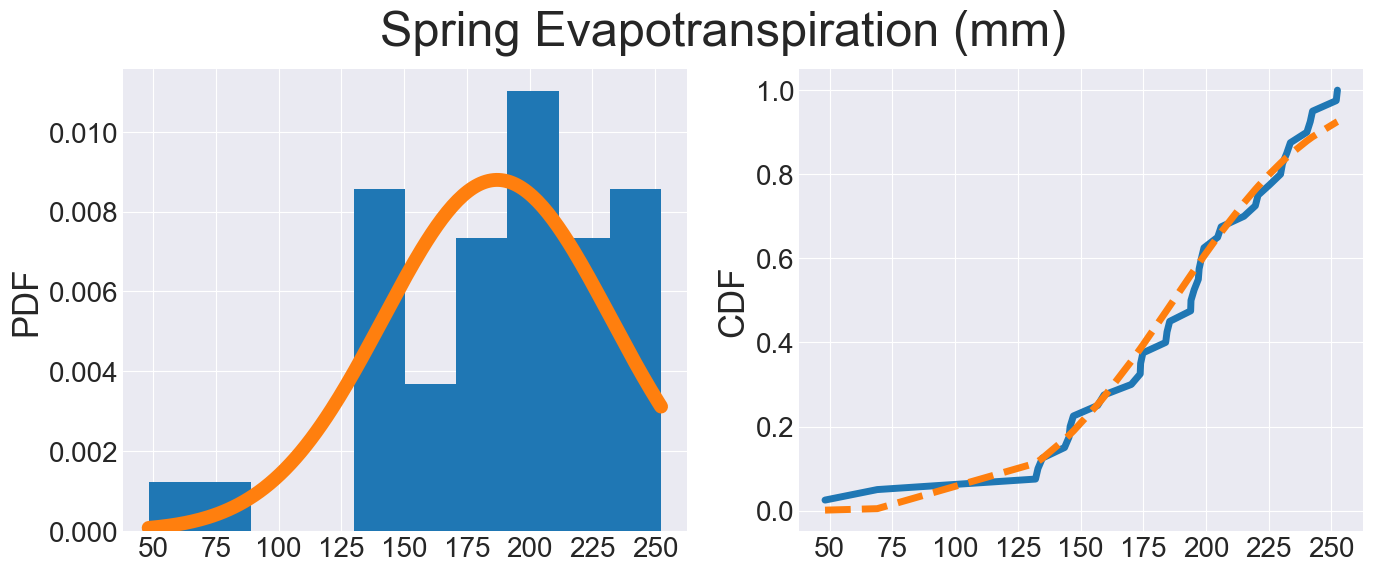

# Descriptive Statistics: Central tendency

## Arithmetic mean

$$\bar{x}_A = \frac{\sum_i^n x_i}{n}$$

- The most common mean, often referred to as the **average**.
- Best for **additive** processes like test scores, temperatures.
- **Sensitive to outliers**.

## Geometric mean

$$\bar{x}_G = \left(\prod_{i=1}^n{x_i}\right)^{1/n}$$

- Best for **multiplicative** processes (e.g., growth rates, interest rates).
- Less sensitive to **outliers** than the arithmetic mean.
- Used for **normalized ratios**.

## Harmonic mean

$$\bar{x}_H = \left(\frac{\sum_i^n x_i^{-1}}{n}\right)^{-1}$$

- Best for rates (e.g., speed, efficiency).
- Gives more weight to smaller values.
- Always less than or equal to the arithmetic and geometric means.

## Median

$$\text{~50th percentile}$$

In [ ]:
print('Arithmetic mean: ',np.mean(spring))
print('Geometric mean: ',scipy.stats.mstats.gmean(spring))
print('Harmonic mean: ',scipy.stats.mstats.hmean(spring))
print('Median: ',np.median(spring))

# Descriptive statistics: Spread

## Standard deviation

$$\sigma = \sqrt{\frac{1}{n-1}\sum_{i=1}^n\left(x_i - \bar{x}\right)^2}$$

## Median absolute deviation

$$m = \frac{1}{n-1}\sum_{i=1}^n\left|x_i - P_{50}\right|$$

## Interquartile range

$$\text{IQR} = P_{75} - P_{25}$$

In [ ]:
print('Standard deviation: ',np.std(spring))
print('Median absolute deviation: ',scipy.stats.median_abs_deviation(spring))
print('Interquartile range:',np.percentile(spring,75)-np.percentile(spring,25))

# Descriptive statistics: Skewness

## Sample skewness coefficient

The skewness coefficient measures the **asymmetry** of a probability distribution around its mean. It helps determine whether a dataset has a **symmetrical distribution** (like a normal distribution) or is skewed left or right.

$$\gamma = \frac{\frac{1}{n-1}\sum_{i=1}^n\left(x_i - \bar{x}\right)^3}{\left[\frac{1}{n-1}\sum_{i=1}^n\left(x_i - \bar{x}\right)^2\right]^{3/2}}$$


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/892px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width="800">


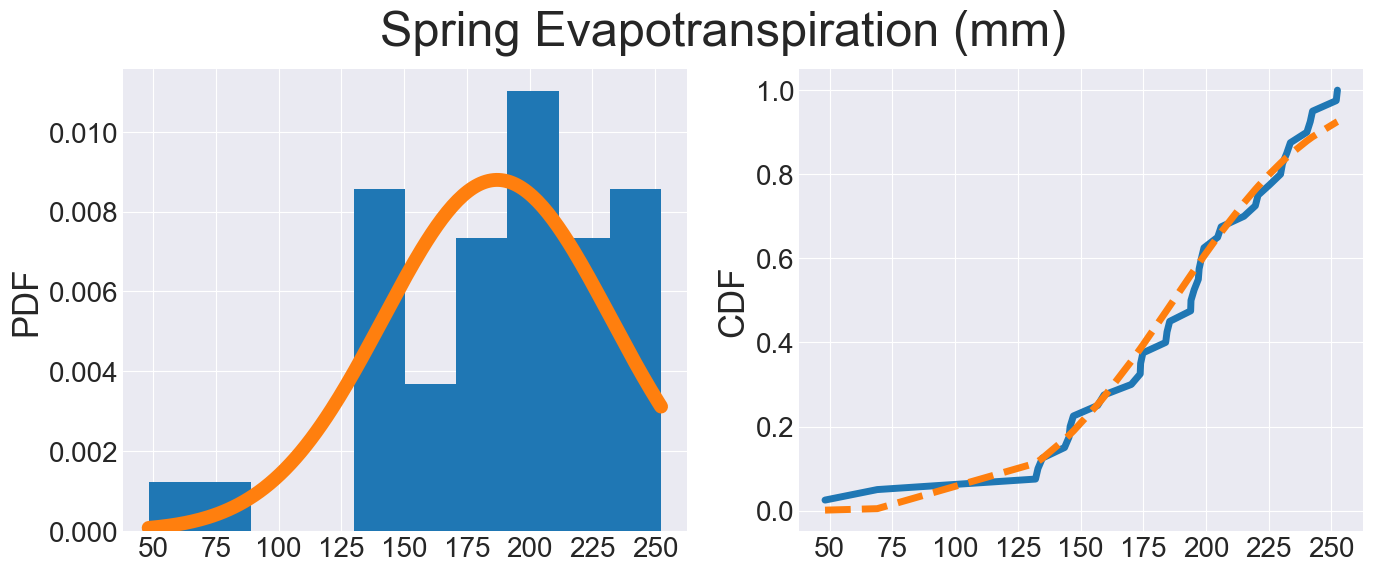

In [ ]:
print('Sample skewness coefficient: ',scipy.stats.skew(spring))

# Let's compute some descriptive statistics over the United States

In [31]:
#Let's look at a set of percentiles
#Extract only Julys
data = fp['evpsfc'][6::12,:,:] #Extract only Julys

In [ ]:
#Mean
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(np.mean(data,axis=0)),cmap=plt.get_cmap('YlGnBu'))
plt.xticks([])
plt.yticks([])
cb= plt.colorbar(orientation='horizontal',pad=0.03,shrink=0.8)
cb.ax.tick_params(labelsize=18)
plt.title(r'Arithmetic mean ET (mm/month)',fontsize=23)
plt.show()

In [ ]:
#Median
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(np.median(data,axis=0)),cmap=plt.get_cmap('YlGnBu'))
plt.xticks([])
plt.yticks([])
cb= plt.colorbar(orientation='horizontal',pad=0.03,shrink=0.8)
cb.ax.tick_params(labelsize=18)
plt.title(r'Median ET (mm/month)',fontsize=23)
plt.show()

In [ ]:
#Standard deviation
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(np.std(data,axis=0)),cmap=plt.get_cmap('YlGnBu'))
plt.xticks([])
plt.yticks([])
cb= plt.colorbar(orientation='horizontal',pad=0.03,shrink=0.8)
cb.ax.tick_params(labelsize=18)
plt.title(r'Standard deviation ET (mm/month)',fontsize=23)
plt.show()

In [ ]:
#Median absolute deviation
plt.figure(figsize=(10,10))
tmp = np.flipud(scipy.stats.median_abs_deviation(data,axis=0))
tmp = np.ma.masked_array(tmp,tmp==0)
plt.imshow(tmp,cmap=plt.get_cmap('YlGnBu'))
plt.xticks([])
plt.yticks([])
cb= plt.colorbar(orientation='horizontal',pad=0.03,shrink=0.8)
cb.ax.tick_params(labelsize=18)
plt.title(r'Median absolute deviation (mm/month)',fontsize=23)
plt.show()

In [ ]:
#Interquartile range
plt.figure(figsize=(10,10))
tmp = np.flipud(np.percentile(data,75,axis=0)-np.percentile(data,25,axis=0))
tmp = np.ma.masked_array(tmp,tmp==0)
plt.imshow(tmp,cmap=plt.get_cmap('YlGnBu'))
plt.xticks([])
plt.yticks([])
cb= plt.colorbar(orientation='horizontal',pad=0.03,shrink=0.8)
cb.ax.tick_params(labelsize=18)
plt.title(r'Interquartile range (mm/month)',fontsize=23)
plt.show()

In [ ]:
#Skewness
plt.figure(figsize=(10,10))
tmp = np.flipud(scipy.stats.skew(data,axis=0))
tmp = np.ma.masked_array(tmp,np.flipud(data[0,:,:])<0)
plt.imshow(tmp,cmap=plt.get_cmap('RdBu'),vmin=-4,vmax=4)
plt.xticks([])
plt.yticks([])
cb= plt.colorbar(orientation='horizontal',pad=0.03,shrink=0.8)
cb.ax.tick_params(labelsize=18)
plt.title(r'Skewness',fontsize=23)
plt.show()